In [28]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# url = [
#     'https://glycemic-index.net/glycemic-index-of-baked-products/',
#     'https://glycemic-index.net/glycemic-index-of-beverages/',
#     'https://glycemic-index.net/glycemic-index-of-dairy-foods/',
#     'https://glycemic-index.net/glycemic-index-of-fast-foods/',
#     'https://glycemic-index.net/glycemic-index-of-fruits/',
#     'https://glycemic-index.net/glycemic-index-of-grains/',
#     'https://glycemic-index.net/glycemic-index-of-greens/',
#     'https://glycemic-index.net/glycemic-index-of-meats/',
    
#     'https://glycemic-index.net/glycemic-index-of-other-foods/',
    
# ]
# # Parse the HTML content
html_content = requests.get('https://glycemic-index.net/glycemic-index-of-baked-products/').text
soup = BeautifulSoup(html_content, 'html.parser')


In [21]:
# Get all the links
element = soup.find('aside', id='custom_html-2')
lis_in_element = element.find_all('li')

urls_to_scrape = [(li.a['href'], "_".join(li['class'][0].split('-')[1:])) for li in lis_in_element]


In [23]:
glycemic_index_data = []

for url, category in urls_to_scrape:
    # Parse the HTML content
    html_content = requests.get(url).text
    soup = BeautifulSoup(html_content, 'html.parser')
    # Find the table that contains glycemic index data
    table = soup.find('table', {'class': 'tftable'})
   
    for row in table.find_all('tr')[1:]:  
        cols = row.find_all('td')
        
        # Extract the relevant data (name, glycemic index, glycemic load)
        food_name = cols[1].text.strip()
        glycemic_index = cols[2].text.strip()
        glycemic_load = cols[3].text.strip()
        
        # Add the data to the list
        glycemic_index_data.append({
            'food_name': food_name,
            'glycemic_index': glycemic_index,
            'glycemic_load': glycemic_load,
            'category': category
        })

# Output the parsed data
# for item in glycemic_index_data:
#     print(item)

pd.DataFrame(glycemic_index_data).to_csv('glycemic_index_data.csv', index=False)


<Axes: xlabel='category'>

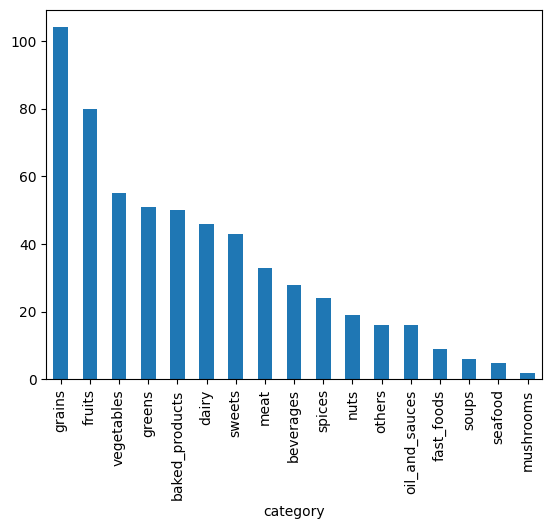

In [24]:

# plot bar graph of category count
df = pd.DataFrame(glycemic_index_data)
df['category'].value_counts().plot(kind='bar')




In [25]:
# Scrape all without categories

rl = 'https://glycemic-index.net/glycemic-index-chart/'
html_content = requests.get(url).text

soup = BeautifulSoup(html_content, 'html.parser')

table = soup.find('table', {'class': 'tftable'})

l = []

for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    food_name = cols[1].text.strip()
    glycemic_index = cols[2].text.strip()
    glycemic_load = cols[3].text.strip()
    l.append({
        'food_name': food_name,
        'glycemic_index': glycemic_index,
        'glycemic_load': glycemic_load
    })

pd.DataFrame(l).to_csv('glycemic_index_data_no_categories.csv', index=False)
    